# EDA for Soybean

In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.stats as stats
from patsy import dmatrices
import numpy as np

--- EDA: Correlation Analysis of All Monthly Stressors ---
Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

Selected 28 monthly stressor variables for correlation analysis.

Generating correlation heatmap...


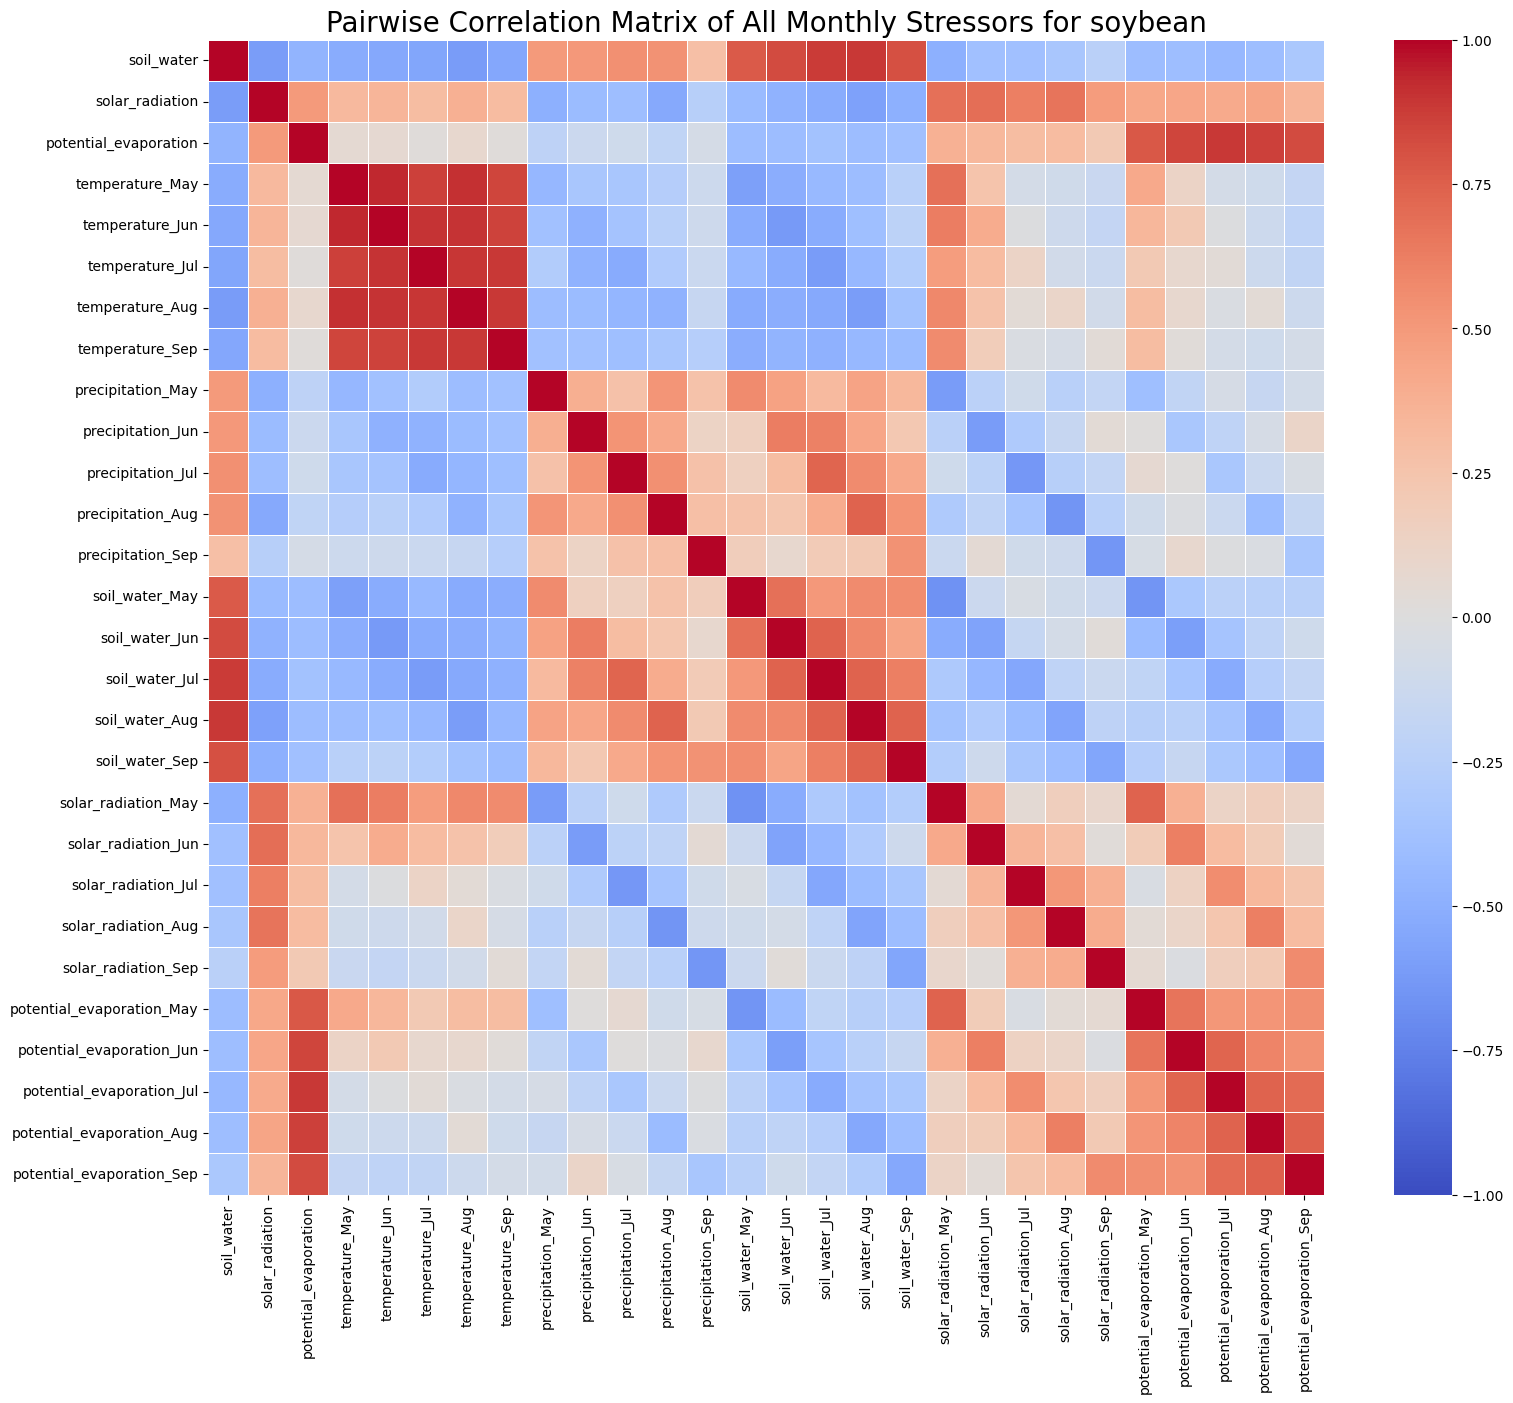

In [2]:
# Exploratory Data Analysis - Full Correlation Matrix

print("--- EDA: Correlation Analysis of All Monthly Stressors ---")

# --- 1. Load the Data ---
# As confirmed, this file is already specific to soybean and its growing season.
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}")

    # --- 2. Select Only the Monthly Stressor Variables ---
    # We will select all columns that have a month name in them, which is a robust
    # way to grab all the monthly predictors we want to investigate.
    monthly_stressors = [col for col in df_soybean.columns if '_' in col and 'yield' not in col]
    df_corr = df_soybean[monthly_stressors]
    
    print(f"\nSelected {len(df_corr.columns)} monthly stressor variables for correlation analysis.")

    # --- 3. Calculate and Print the Correlation Matrix ---
    correlation_matrix = df_corr.corr()
    
    # Optional: If you want to see the full numerical matrix, uncomment the next line
    # print("\n--- Full Pairwise Correlation Matrix ---")
    # print(correlation_matrix)

    # --- 4. Visualize the Matrix with a Heatmap ---
    # A heatmap is the best way to see the broad patterns of collinearity.
    print("\nGenerating correlation heatmap...")
    
    plt.figure(figsize=(18, 15))
    heatmap = sns.heatmap(
        correlation_matrix,
        cmap='coolwarm',  # Use a diverging colormap (red=positive, blue=negative)
        center=0,         # Center the colormap at zero
        vmin=-1,          # Set the color scale limits to the theoretical min/max
        vmax=1,
        linewidths=.5,
        annot=False       # Annotations are turned off as the matrix is too large to be readable
    )
    
    plt.title('Pairwise Correlation Matrix of All Monthly Stressors for soybean', fontsize=20)
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Extended EDA for Soybean Yield Analysis ---
Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Task 1: Analyzing the distribution of the dependent variable 'yield_soybean' ---


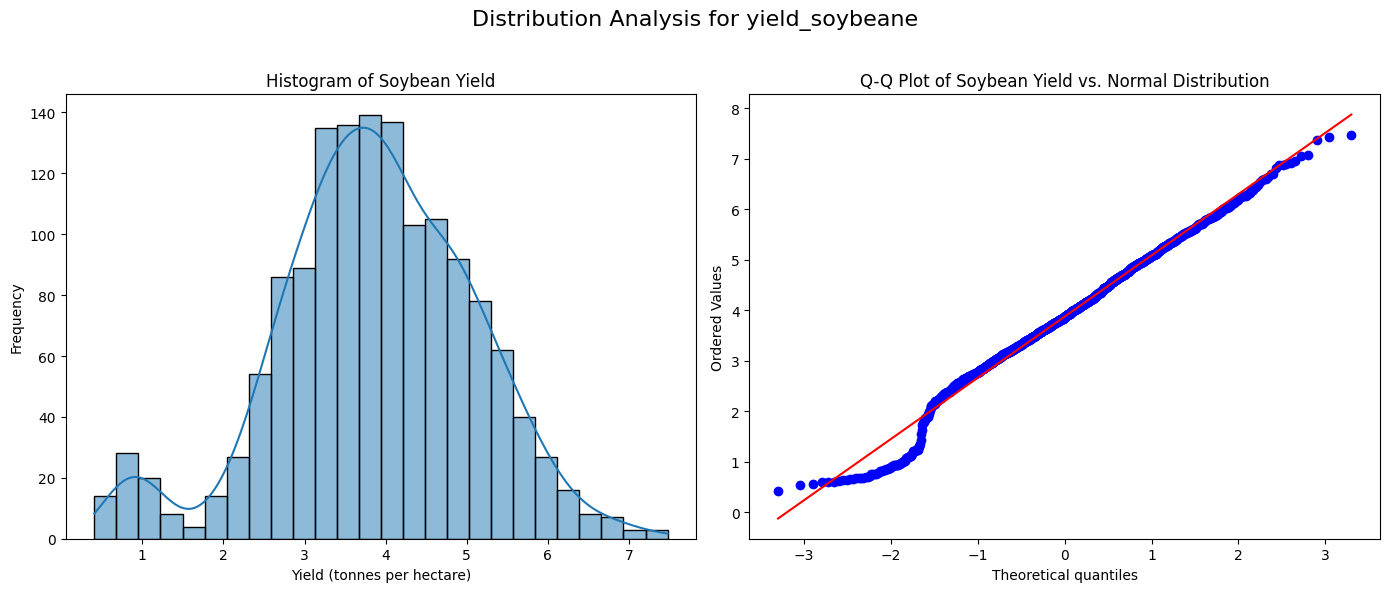

Distribution plots generated. Check for positive skew, which supports our choice of a Gamma GLM.

--- Task 2: Visualizing relationships between yield and key climate stressors ---


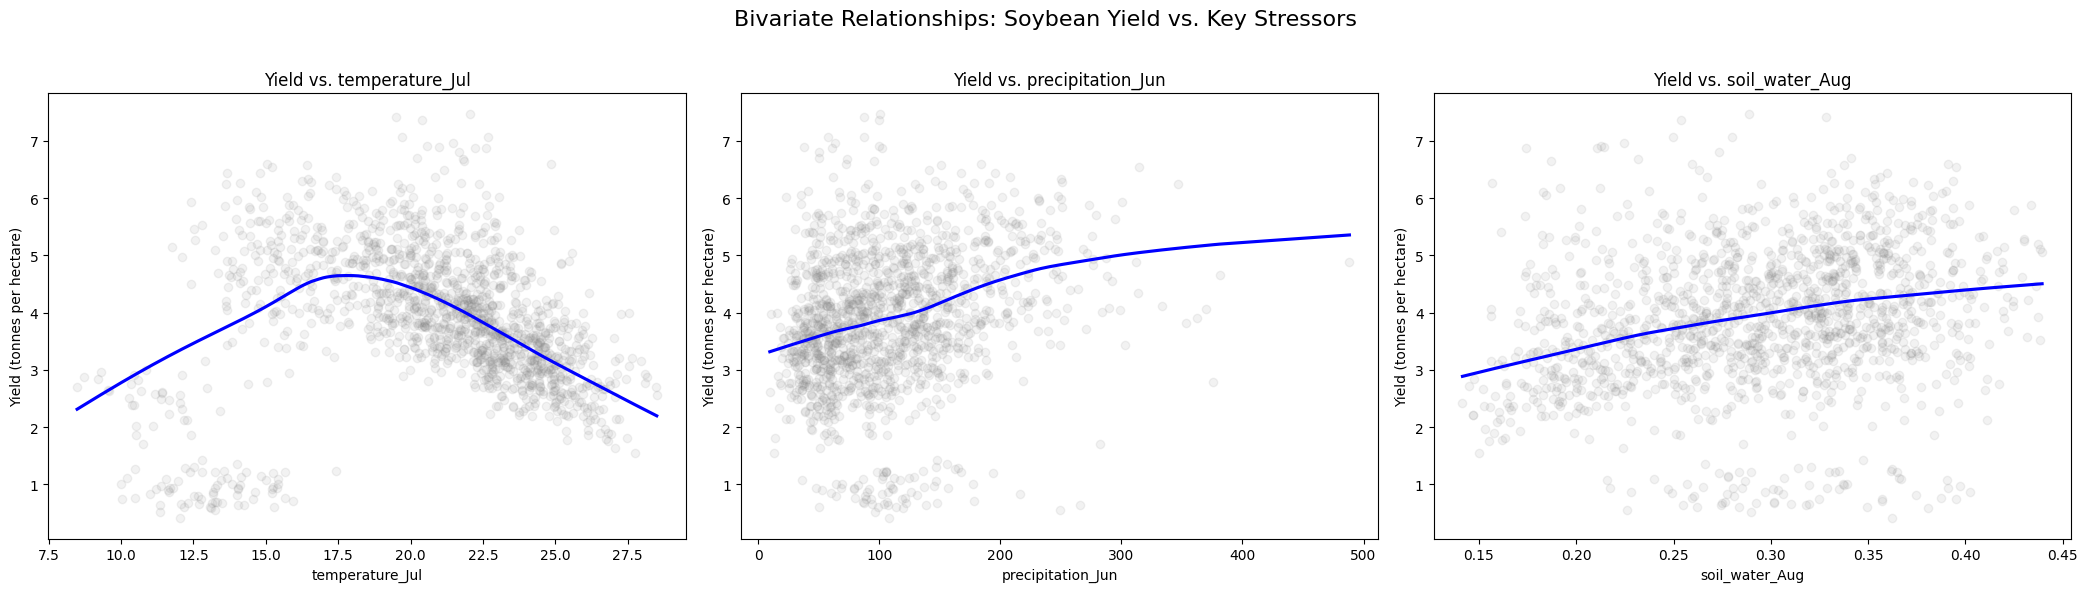

Scatter plots generated. Look for non-linear patterns that might inform our final model.

--- Task 3: Examining long-term trends in yield and a key climate variable ---


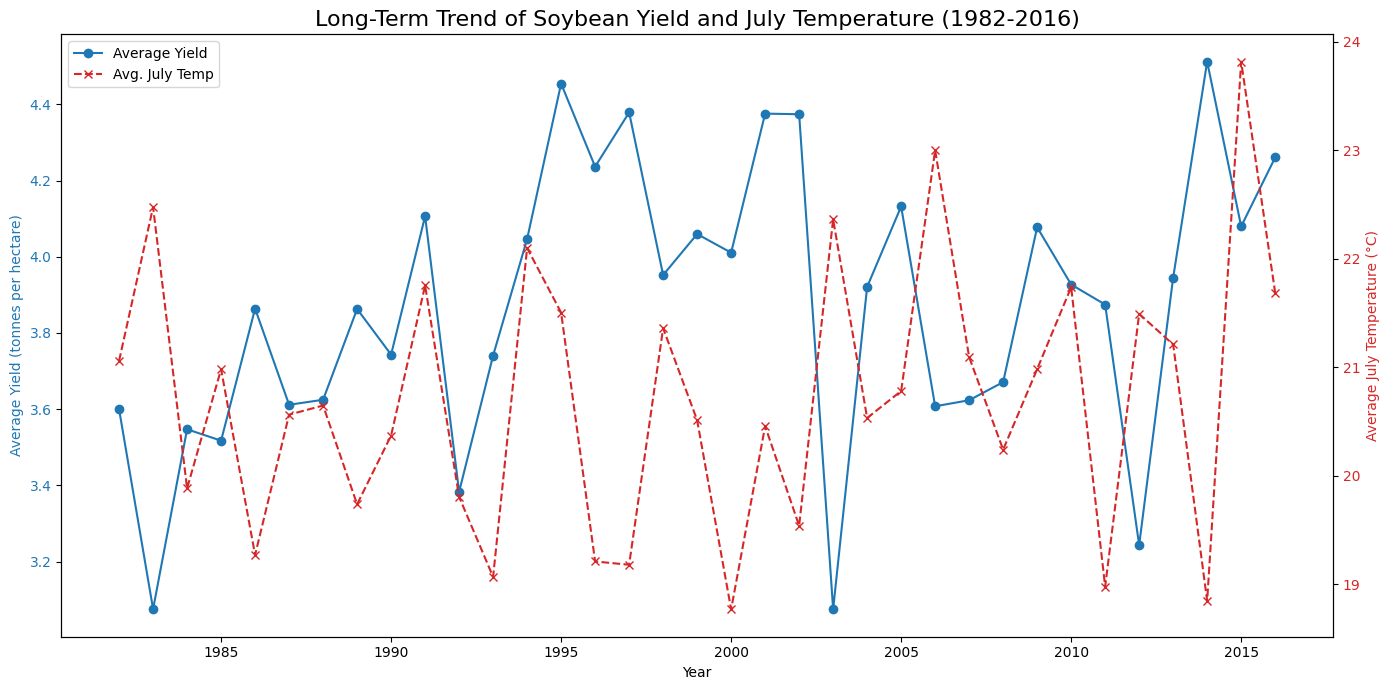

Time-series plot generated. Note the clear upward trend in yield, confirming the need for a 'year' control variable.



In [3]:
print("--- Extended EDA for Soybean Yield Analysis ---")

# --- 1. Load the Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- Task 1: Examine the Distribution of the Dependent Variable (yield_soybean) ---
    print("--- Task 1: Analyzing the distribution of the dependent variable 'yield_soybean' ---")
    
    # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Distribution Analysis for yield_soybeane', fontsize=16)

    # a) Histogram with a Kernel Density Estimate (KDE)
    # This helps us visually assess the shape, center, and spread of the yield data.
    # We are checking for positive skewness, which is characteristic of data modeled by a Gamma distribution.
    sns.histplot(df_soybean['yield_soybean'], kde=True, ax=axes[0])
    axes[0].set_title('Histogram of Soybean Yield')
    axes[0].set_xlabel('Yield (tonnes per hectare)')
    axes[0].set_ylabel('Frequency')

    # b) Q-Q (Quantile-Quantile) Plot against a theoretical normal distribution
    # This plot helps us assess if the data's distribution follows a specific theoretical distribution.
    # Deviations from the red line suggest skewness or heavy tails.
    # While our target is a Gamma GLM, a Q-Q plot vs. Normal is a standard first step to detect non-normality.
    stats.probplot(df_soybean['yield_soybean'], dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot of Soybean Yield vs. Normal Distribution')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("Distribution plots generated. Check for positive skew, which supports our choice of a Gamma GLM.\n")


    # --- Task 2: Bivariate Scatter Plots of Yield vs. Key Stressors ---
    print("--- Task 2: Visualizing relationships between yield and key climate stressors ---")
    
    # Select a few key stressors based on agronomic theory for soybean
    key_stressors = ['temperature_Jul', 'precipitation_Jun', 'soil_water_Aug']
    
    # Create a figure to hold the scatter plots
    fig, axes = plt.subplots(1, len(key_stressors), figsize=(21, 6))
    fig.suptitle('Bivariate Relationships: Soybean Yield vs. Key Stressors', fontsize=16)

    for i, stressor in enumerate(key_stressors):
        # We use a regression plot with a LOWESS (Locally Weighted Scatterplot Smoothing) curve.
        # This is a non-parametric way to see the underlying trend without assuming a linear relationship.
        # It's excellent for spotting potential non-linearities (like an inverted 'U' shape).
        sns.regplot(
            x=stressor,
            y='yield_soybean',
            data=df_soybean,
            ax=axes[i],
            lowess=True, # Use LOWESS smoother to detect non-linear patterns
            scatter_kws={'alpha': 0.1, 'color': 'gray'}, # De-emphasize individual points
            line_kws={'color': 'blue'} # Emphasize the trend line
        )
        axes[i].set_title(f'Yield vs. {stressor}')
        axes[i].set_xlabel(f'{stressor}')
        axes[i].set_ylabel('Yield (tonnes per hectare)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("Scatter plots generated. Look for non-linear patterns that might inform our final model.\n")


    # --- Task 3: Plot Key Variables Over Time ---
    print("--- Task 3: Examining long-term trends in yield and a key climate variable ---")
    
    # Calculate the mean of yield and a key stressor for each year
    yearly_data = df_soybean.groupby('year')[['yield_soybean', 'temperature_Jul']].mean().reset_index()

    # Create a plot with a primary and secondary y-axis to show both trends together.
    # This confirms the necessity of including 'year' as a control variable to capture trends
    # likely related to technology, while also checking for climate trends.
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plotting average yield on the primary (left) y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Yield (tonnes per hectare)', color=color)
    ax1.plot(yearly_data['year'], yearly_data['yield_soybean'], color=color, marker='o', label='Average Yield')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()
    
    # Plotting average temperature on the secondary (right) y-axis
    color = 'tab:red'
    ax2.set_ylabel('Average July Temperature (°C)', color=color)
    ax2.plot(yearly_data['year'], yearly_data['temperature_Jul'], color=color, linestyle='--', marker='x', label='Avg. July Temp')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Long-Term Trend of Soybean Yield and July Temperature (1982-2016)', fontsize=16)
    fig.tight_layout()
    # Adding a single legend for both lines
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.show()
    print("Time-series plot generated. Note the clear upward trend in yield, confirming the need for a 'year' control variable.\n")


except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except KeyError as e:
    print(f"ERROR: A required column was not found in the dataset: {e}. Please check the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# regularization

In [4]:
# --- 1. Load the Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}")

    # --- 2. Define the Full Model Formula ---
    # Programmatically get all monthly stressor column names
    monthly_stressors = [col for col in df_soybean.columns if '_' in col and 'yield' not in col]
    
    # Join them with '+' to create the predictor part of the formula
    stressor_formula_part = ' + '.join(monthly_stressors)
    
    # Construct the complete R-style formula string.
    # We include our controls (year, spatial splines) and all potential predictors.
    # Note: patsy's bs() function creates the basis spline columns.
    formula = f"yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) + {stressor_formula_part}"
    
    print("\nGenerated model formula for patsy:")
    print(formula) # Uncomment to see the full, very long formula string

    # --- 3. Create the Design Matrix (X) and Response Vector (y) ---
    # patsy processes the formula and the dataframe to create the matrices needed for modeling.
    # 'y' will be our dependent variable, 'X' will be the full set of predictors.
    # The intercept is automatically included in 'X' by patsy.
    print("\nCreating design matrix (X) and response vector (y) using patsy...")
    y, X = dmatrices(formula, data=df_soybean, return_type='dataframe')
    
    print(f"Successfully created response vector y with shape: {y.shape}")
    print(f"Successfully created design matrix X with shape: {X.shape}")
    print(f"The {X.shape[1]} columns in X include the intercept, year, 8 spline bases (4 for lat, 4 for lon), and {len(monthly_stressors)} climate stressors.")

    # --- 4. Standardize the Predictor Matrix (X) ---
    # We scale ALL predictors to have a mean of 0 and a standard deviation of 1.
    # This ensures the regularization penalty is applied fairly to all variables.
    # We do NOT scale the response variable y.
    print("\nStandardizing the design matrix X...")
    
    # We remove the Intercept column before scaling, as it should not be regularized or scaled.
    # We will add it back later if needed, but scikit-learn's models handle it by default.
    X_no_intercept = X.drop('Intercept', axis=1)
    
    scaler = StandardScaler()
    X_scaled_values = scaler.fit_transform(X_no_intercept)
    
    # Convert the scaled array back to a pandas DataFrame with the original column names
    X_scaled = pd.DataFrame(X_scaled_values, columns=X_no_intercept.columns, index=X.index)
    
    print("Standardization complete.")
    
    # Verification: Check the mean and standard deviation of a few scaled columns
    print("\n--- Verification of Standardization ---")
    verification_cols = ['year', 'bs(lat, df=4)[0]', 'temperature_Jul']
    for col in verification_cols:
        mean_val = X_scaled[col].mean()
        std_val = X_scaled[col].std()
        print(f"Column '{col}': Mean = {mean_val:.4f}, Std Dev = {std_val:.4f}")
    print("------------------------------------")
    

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

Generated model formula for patsy:
yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) + soil_water + solar_radiation + potential_evaporation + temperature_May + temperature_Jun + temperature_Jul + temperature_Aug + temperature_Sep + precipitation_May + precipitation_Jun + precipitation_Jul + precipitation_Aug + precipitation_Sep + soil_water_May + soil_water_Jun + soil_water_Jul + soil_water_Aug + soil_water_Sep + solar_radiation_May + solar_radiation_Jun + solar_radiation_Jul + solar_radiation_Aug + solar_radiation_Sep + potential_evaporation_May + potential_evaporation_Jun + potential_evaporation_Jul + potential_evaporation_Aug + potential_evaporation_Sep

Creating design matrix (X) and response vector (y) using patsy...
Successfully created response vector y with shape: (1435, 1)
Successfully created design matrix X with shape: (1435, 38)
The 38 columns in X includ

Successfully initialized Gamma GLM with a log link.
Will fit the model for 100 alpha values with L1_wt (l1_ratio) = 0.5


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")



Completed fitting models along the regularization path.
Generating the regularization path plot...


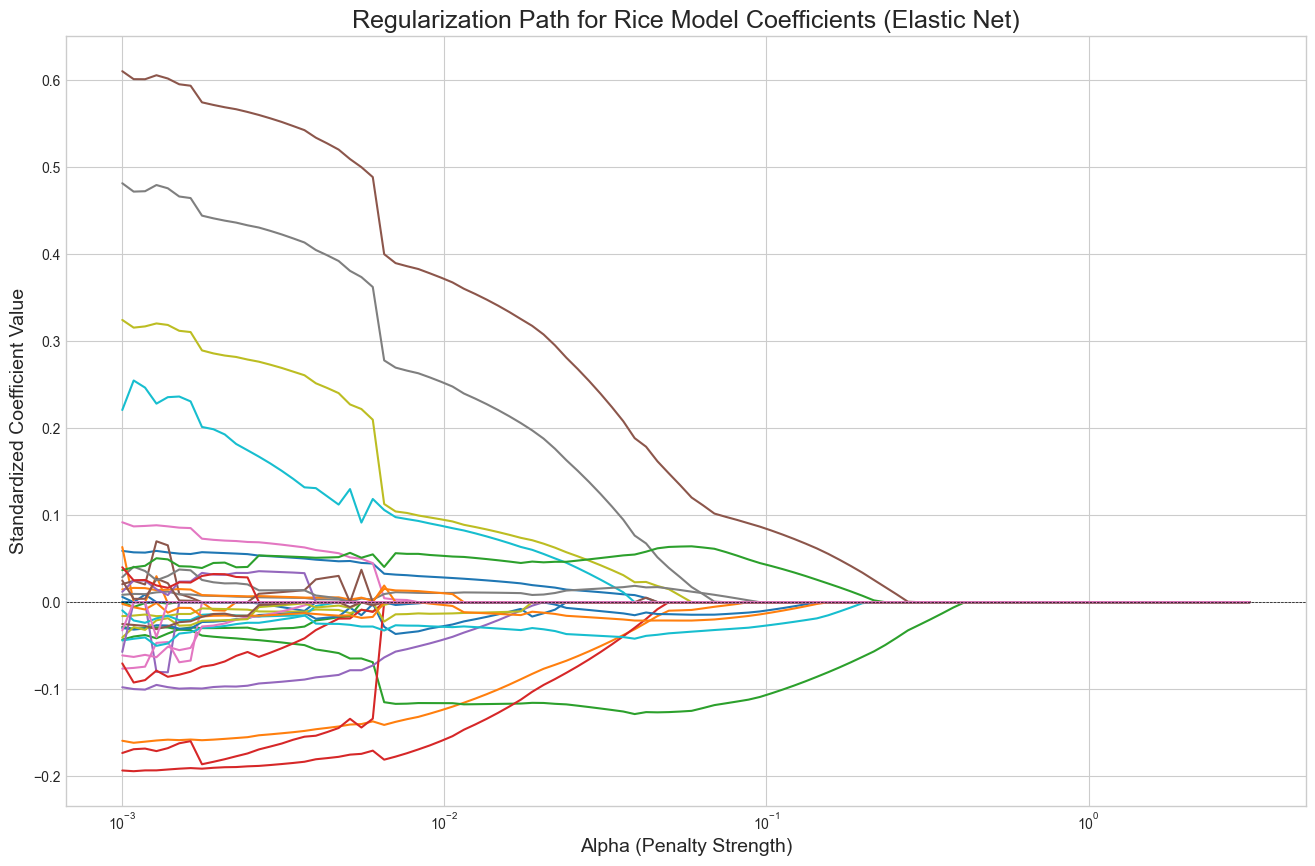

In [5]:
# We assume 'y' and 'X_scaled' are already in memory from the previous step.
# If not, you would need to re-run the data preparation script.

try:
    # --- 1. Define the GLM Model ---
    # We specify our model family (Gamma) and the link function (log) as per our project plan.
    # We pass the prepared y and the fully scaled X matrix.
    # Note: statsmodels requires the intercept to be in the X matrix, which patsy provided.
    
    # We need to add the intercept back to the scaled data for statsmodels GLM
    X_scaled_with_intercept = X.copy() # Start with the original X to preserve intercept and structure
    X_scaled_with_intercept[X_no_intercept.columns] = X_scaled # Replace non-intercept columns with scaled versions

    gl_gamma = sm.GLM(y, X_scaled_with_intercept, family=sm.families.Gamma(link=sm.families.links.log()))
    print("Successfully initialized Gamma GLM with a log link.")

    # --- 2. Set up the Regularization Path ---
    # We need to test a series of alpha values (penalty strengths).
    # A logarithmic scale is best for this, from a weak penalty to a strong one.
    n_alphas = 100
    alphas = np.logspace(-3, 0.5, n_alphas) # From 0.001 to ~3.16

    # The L1_wt parameter controls the Elastic Net mix (0=Ridge, 1=Lasso). 
    # 0.5 is a balanced choice.
    elastic_net_l1_wt = 0.5 
    
    print(f"Will fit the model for {n_alphas} alpha values with L1_wt (l1_ratio) = {elastic_net_l1_wt}")

    # --- 3. Fit the Model for Each Alpha and Store Coefficients ---
    # We will loop through our alphas and save the coefficients from each model fit.
    coefficients = []
    
    for alpha_val in alphas:
        # The fit_regularized method performs the Elastic Net estimation.
        # We set refit=False because we want to see the shrunken coefficients for this analysis.
        results = gl_gamma.fit_regularized(
            method='elastic_net', 
            alpha=alpha_val, 
            L1_wt=elastic_net_l1_wt,
            refit=False 
        )
        coefficients.append(results.params)
    
    # Convert the list of coefficient series into a DataFrame for easy plotting
    coef_df = pd.DataFrame(coefficients, index=alphas)
    coef_df.index.name = "alpha"
    
    # Exclude the Intercept for plotting, as it's not regularized and has a different scale.
    coef_df_no_intercept = coef_df.drop('Intercept', axis=1)
    
    print("\nCompleted fitting models along the regularization path.")

    # --- 4. Visualize the Regularization Path ---
    print("Generating the regularization path plot...")
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(16, 10))

    ax.plot(coef_df_no_intercept)
    ax.set_xscale('log') # The alpha path is best viewed on a log scale
    
    # Add a vertical line at zero
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    
    ax.set_title('Regularization Path for Rice Model Coefficients (Elastic Net)', fontsize=18)
    ax.set_xlabel('Alpha (Penalty Strength)', fontsize=14)
    ax.set_ylabel('Standardized Coefficient Value', fontsize=14)
    
    # To avoid a cluttered legend, we don't add one here. The goal is to see the general pattern.
    # Alternatively, for fewer variables, a legend could be useful:
    # ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

    plt.show()

except NameError:
    print("ERROR: Make sure that 'y' and 'X_scaled' DataFrames from the previous step are available in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [6]:
# --- Corrected code to identify the most robust variables ---
# We will inspect the coefficients at a moderately high alpha value
# This tells us which variables "survived" the penalty the longest.
alpha_to_inspect = 0.03 

try:
    # Find the alpha in our index that is closest to our target
    # CORRECTED LINE: The operation works directly on the index without .flat
    closest_alpha = coef_df.index[np.abs(coef_df.index - alpha_to_inspect).argmin()]

    print(f"--- Coefficients at alpha ≈ {closest_alpha:.4f} ---")

    # Get the coefficients at this alpha and sort them by absolute value
    robust_coeffs = coef_df.loc[closest_alpha].copy()
    robust_coeffs_sorted = robust_coeffs.abs().sort_values(ascending=False)

    print("\nVariables sorted by the absolute magnitude of their shrunken coefficient:")
    # We display more variables to get a fuller picture
    print(robust_coeffs_sorted.head(15))

    # Let's also see their actual values (positive or negative) for the top variables
    print("\n--- Actual coefficient values for the most robust variables ---")
    print(coef_df.loc[closest_alpha, robust_coeffs_sorted.index].head(10))

except NameError:
     print("ERROR: Make sure that 'coef_df' DataFrame from the previous step is available in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Coefficients at alpha ≈ 0.0305 ---

Variables sorted by the absolute magnitude of their shrunken coefficient:
Intercept                    1.283383
bs(lon, df=4)[0]             0.239644
bs(lon, df=4)[2]             0.124417
bs(lat, df=4)[1]             0.122202
bs(lat, df=4)[2]             0.057350
potential_evaporation_May    0.050724
bs(lat, df=4)[0]             0.050518
bs(lon, df=4)[3]             0.042466
solar_radiation_Jul          0.038748
soil_water                   0.025882
solar_radiation_Sep          0.018151
precipitation_May            0.015713
year                         0.011464
solar_radiation_Aug          0.010280
bs(lat, df=4)[3]             0.000000
Name: 0.030538555088334154, dtype: float64

--- Actual coefficient values for the most robust variables ---
Intercept                    1.283383
bs(lon, df=4)[0]             0.239644
bs(lon, df=4)[2]             0.124417
bs(lat, df=4)[1]            -0.122202
bs(lat, df=4)[2]            -0.057350
potential_evaporat

# modeling

In [8]:
print("--- Fitting the Base Champion Model ---")

# --- 1. Load the Data ---
# We use the original dataframe for this step.
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the Champion Model ---
    # This formula contains only the variables that proved robust in the regularization step.
    # We use statsmodels.formula.api which simplifies fitting models from a formula string.
    champion_formula = "yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) + potential_evaporation_May + solar_radiation_Jul + soil_water + precipitation_May"

    # Initialize the GLM model using the formula and the dataframe.
    # Specify the Gamma family with a log link as planned.
    base_model = smf.glm(
        formula=champion_formula,
        data=df_soybean,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model. This is the standard, un-penalized fit.
    base_model_results = base_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    # This summary is now statistically valid and is the basis for our interpretation.
    print("--- Summary of the Base Champion Model ---")
    print(base_model_results.summary())

    # --- 4. Print AIC for Future Comparison ---
    # The AIC is a key metric for comparing different model formulations. Lower is better.
    print("\n" + "="*80)
    print(f"AIC for Base Champion Model: {base_model_results.aic:.2f}")
    print("This will be our benchmark for comparison.")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Fitting the Base Champion Model ---
Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Base Champion Model ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:          yield_soybean   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1421
Model Family:                   Gamma   Df Model:                           13
Link Function:                    log   Scale:                        0.048641
Method:                          IRLS   Log-Likelihood:                -1744.4
Date:                Mon, 17 Nov 2025   Deviance:                       72.424
Time:                        15:30:19   Pearson chi2:                     69.1
No. Iterations:                    14   Pseudo R-squ. (CS):             0.8294
Covariance Type:            nonrobust                                         
         

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


## non linearity

In [10]:
print("--- Testing for Non-Linearity (Quadratic Term for solar_rad_Jul) ---")

# --- 1. Load the Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the Model with the Quadratic Term ---
    # We build on our simplified champion by adding a squared term for solar_radiation_Jul.
    # This directly tests the inverted U-shape hypothesis from our EDA.
    quadratic_formula = "yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) + potential_evaporation_May + solar_radiation_Jul + soil_water + precipitation_May + I(solar_radiation_Jul**2)"

    # Initialize the GLM model using the new quadratic formula.
    quadratic_model = smf.glm(
        formula=quadratic_formula,
        data=df_soybean,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model.
    quadratic_model_results = quadratic_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    print("--- Summary of the Model with Quadratic Term ---")
    print(quadratic_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3516.86).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Quadratic Model: {quadratic_model_results.aic:.2f}")
    print("Compare this to the Simplified Base Model's AIC (3516.86).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Testing for Non-Linearity (Quadratic Term for solar_rad_Jul) ---
Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Model with Quadratic Term ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:          yield_soybean   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1433
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                        0.085274
Method:                          IRLS   Log-Likelihood:                -2497.9
Date:                Mon, 17 Nov 2025   Deviance:                       186.03
Time:                        15:40:59   Pearson chi2:                     152.
No. Iterations:                    14   Pseudo R-squ. (CS):            0.07734
Covariance Type:            nonrobust                

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


## interpreatation

This model fails compleatly. Something breaks in the internal fitting process, and I think this is probs cause of multicolineariity introduced by the quadratic term, and the instense numerical variables of the solar radiation columns. So the idea is that if we standardize the solar radiation columns, this should fix the problem. 

We are doing z score standardization. It does two things: it centers the variable at zero AND it scales it to have a standard deviation of 1. This is like what we did when we standardized all our variables for regularization. 

In [18]:
print("--- Testing for Non-Linearity (Quadratic Term for solar_rad_Jul) ---")

# --- 1. Load the Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    df_soybean["solar_rad_Jul_z"] = (
    df_soybean["solar_radiation_Jul"] - df_soybean["solar_radiation_Jul"].mean()
    ) / df_soybean["solar_radiation_Jul"].std()


    # --- 2. Define and Fit the Model with the Quadratic Term ---
    # We build on our simplified champion by adding a squared term for solar_radiation_Jul.
    # This directly tests the inverted U-shape hypothesis from our EDA.
    quadratic_formula = """
    yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) +
                    potential_evaporation_May + solar_rad_Jul_z +
                    soil_water + precipitation_May +
                    I(solar_rad_Jul_z**2)
    """


    # Initialize the GLM model using the new quadratic formula.
    quadratic_model = smf.glm(
        formula=quadratic_formula,
        data=df_soybean,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model.
    quadratic_model_results = quadratic_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    print("--- Summary of the Model with Quadratic Term ---")
    print(quadratic_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3516.86).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Quadratic Model: {quadratic_model_results.aic:.2f}")
    print("Compare this to the Simplified Base Model's AIC (3516.86).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Testing for Non-Linearity (Quadratic Term for solar_rad_Jul) ---
Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Model with Quadratic Term ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:          yield_soybean   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1420
Model Family:                   Gamma   Df Model:                           14
Link Function:                    log   Scale:                        0.047956
Method:                          IRLS   Log-Likelihood:                -1733.4
Date:                Mon, 17 Nov 2025   Deviance:                       71.331
Time:                        16:25:08   Pearson chi2:                     68.1
No. Iterations:                    17   Pseudo R-squ. (CS):             0.8363
Covariance Type:            nonrobust                

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [20]:
print("--- Testing for Non-Linearity (Quadratic Term for solar_rad_Jul) ---")

# --- 1. Load the Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    df_soybean["solar_rad_Jul_z"] = (
    df_soybean["solar_radiation_Jul"] - df_soybean["solar_radiation_Jul"].mean()
    ) / df_soybean["solar_radiation_Jul"].std()


    # --- 2. Define and Fit the Model with the Quadratic Term ---
    # We build on our simplified champion by adding a squared term for solar_radiation_Jul.
    # This directly tests the inverted U-shape hypothesis from our EDA.
    second_quadratic_formula = """
    yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) +
                    potential_evaporation_May + solar_rad_Jul_z +
                    soil_water + precipitation_May +
                    I(solar_rad_Jul_z**2) + I(precipitation_May**2)
    """


    # Initialize the GLM model using the new quadratic formula.
    second_quadratic_model = smf.glm(
        formula=second_quadratic_formula,
        data=df_soybean,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model.
    second_quadratic_model_results = second_quadratic_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    print("--- Summary of the Model with Quadratic Term ---")
    print(second_quadratic_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3496.83).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Quadratic Model: {second_quadratic_model_results.aic:.2f}")
    print("Compare this to the Simplified Base Model's AIC (3496.83).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Testing for Non-Linearity (Quadratic Term for solar_rad_Jul) ---
Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Model with Quadratic Term ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:          yield_soybean   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1419
Model Family:                   Gamma   Df Model:                           15
Link Function:                    log   Scale:                        0.047455
Method:                          IRLS   Log-Likelihood:                -1727.5
Date:                Mon, 17 Nov 2025   Deviance:                       70.747
Time:                        18:10:28   Pearson chi2:                     67.3
No. Iterations:                    17   Pseudo R-squ. (CS):             0.8408
Covariance Type:            nonrobust                

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


## interractions

In [23]:
print("--- Testing for interractions ---")

# --- 1. Load the Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    df_soybean["solar_rad_Jul_z"] = (
    df_soybean["solar_radiation_Jul"] - df_soybean["solar_radiation_Jul"].mean()
    ) / df_soybean["solar_radiation_Jul"].std()


    # --- 2. Define and Fit the Model with the interraction ---
    interraction_formula = """
    yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) +
                    potential_evaporation_May + solar_rad_Jul_z +
                    soil_water + precipitation_May +
                    I(solar_rad_Jul_z**2) + I(precipitation_May**2)
                    + solar_rad_Jul_z:soil_water + potential_evaporation_May:solar_rad_Jul_z
    """


    # Initialize the GLM model using the new quadratic formula.
    interraction_model = smf.glm(
        formula=interraction_formula,
        data=df_soybean,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model.
    interraction_model_results = interraction_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    print("--- Summary of the Model with interraction Term ---")
    print(interraction_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3487.03).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Quadratic Model: {interraction_model_results.aic:.2f}")
    print("Compare this to the Simplified Base Model's AIC (3487.03).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Testing for interractions ---
Successfully loaded dataset from: ../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Model with interraction Term ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:          yield_soybean   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1417
Model Family:                   Gamma   Df Model:                           17
Link Function:                    log   Scale:                        0.046510
Method:                          IRLS   Log-Likelihood:                -1705.9
Date:                Mon, 17 Nov 2025   Deviance:                       68.679
Time:                        18:36:22   Pearson chi2:                     65.9
No. Iterations:                    17   Pseudo R-squ. (CS):             0.8513
Covariance Type:            nonrobust                                         
      

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


## visaulisations

--- Generating Final Yield Response Curves for Soybean ---
Data prepared successfully.
Fitting Final Champion model for Soybean...
Model fitted successfully. AIC: 3447.76

Generating Plot A: Yield Response to Soil Water...


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


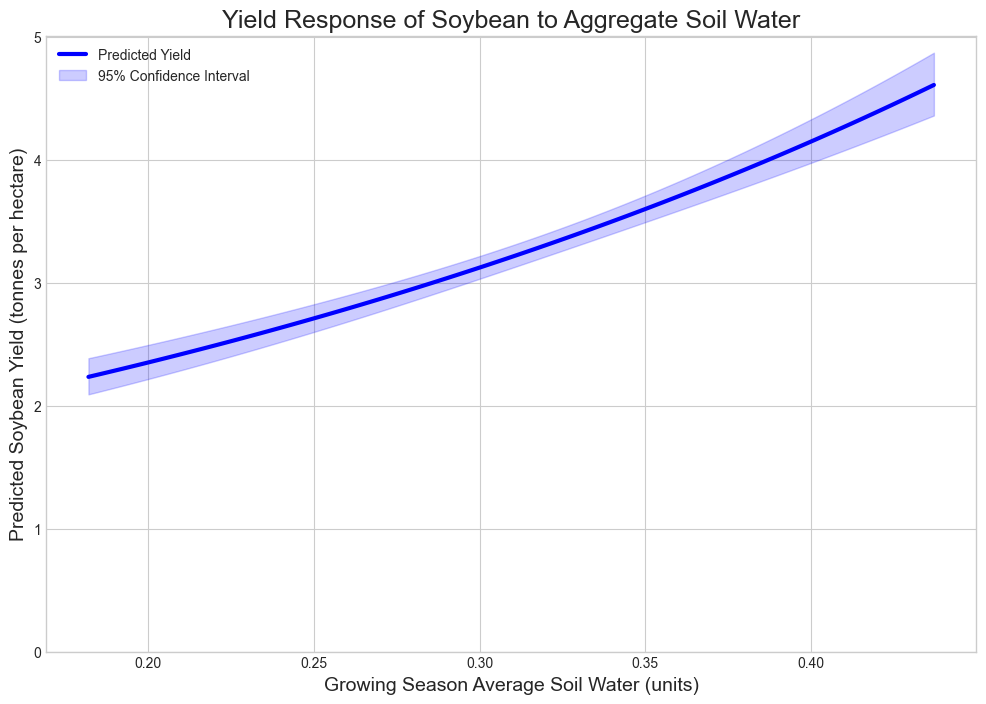


Generating Plot B: Non-Linear Yield Response to July Solar Radiation...


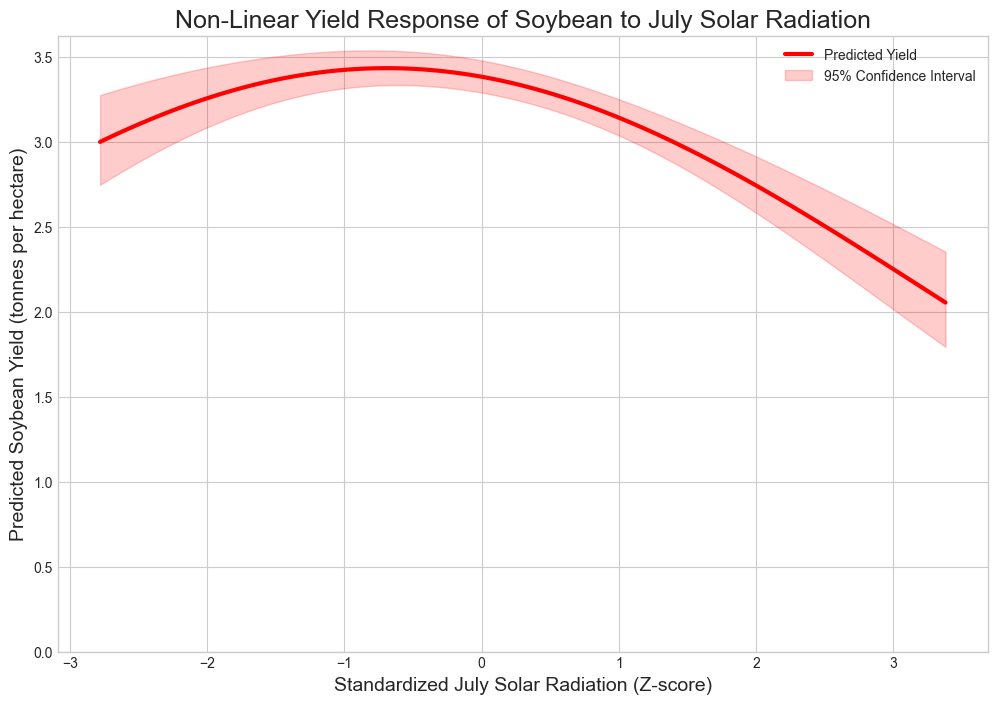


Generating Plot C: Non-Linear Yield Response to May Precipitation...


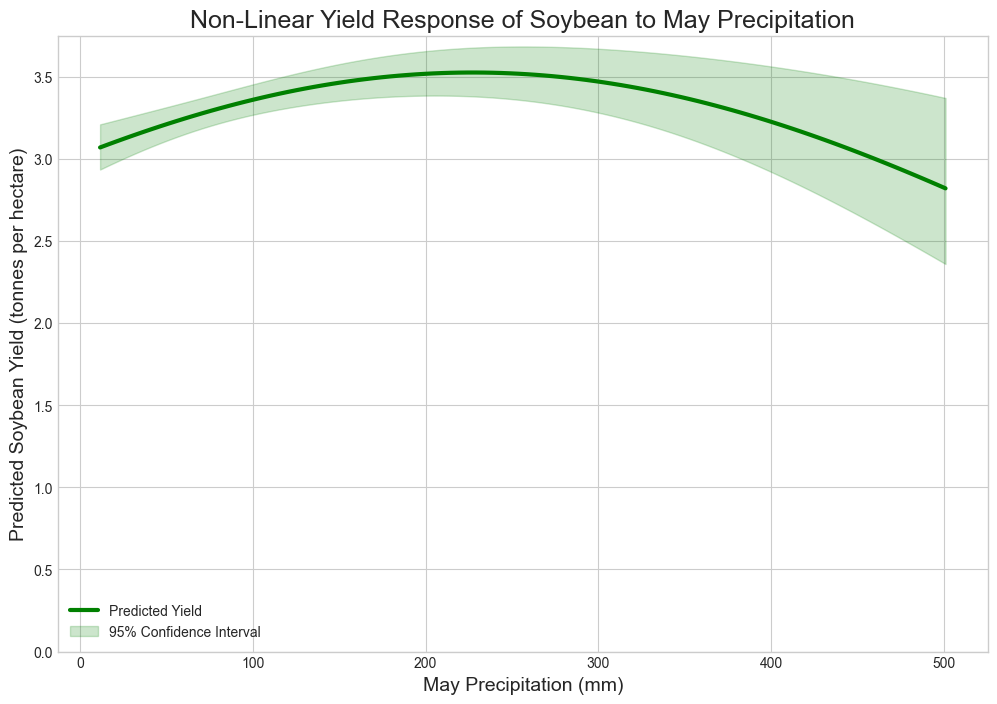


Generating Plot D: The "Heat x Water" Interaction Effect...


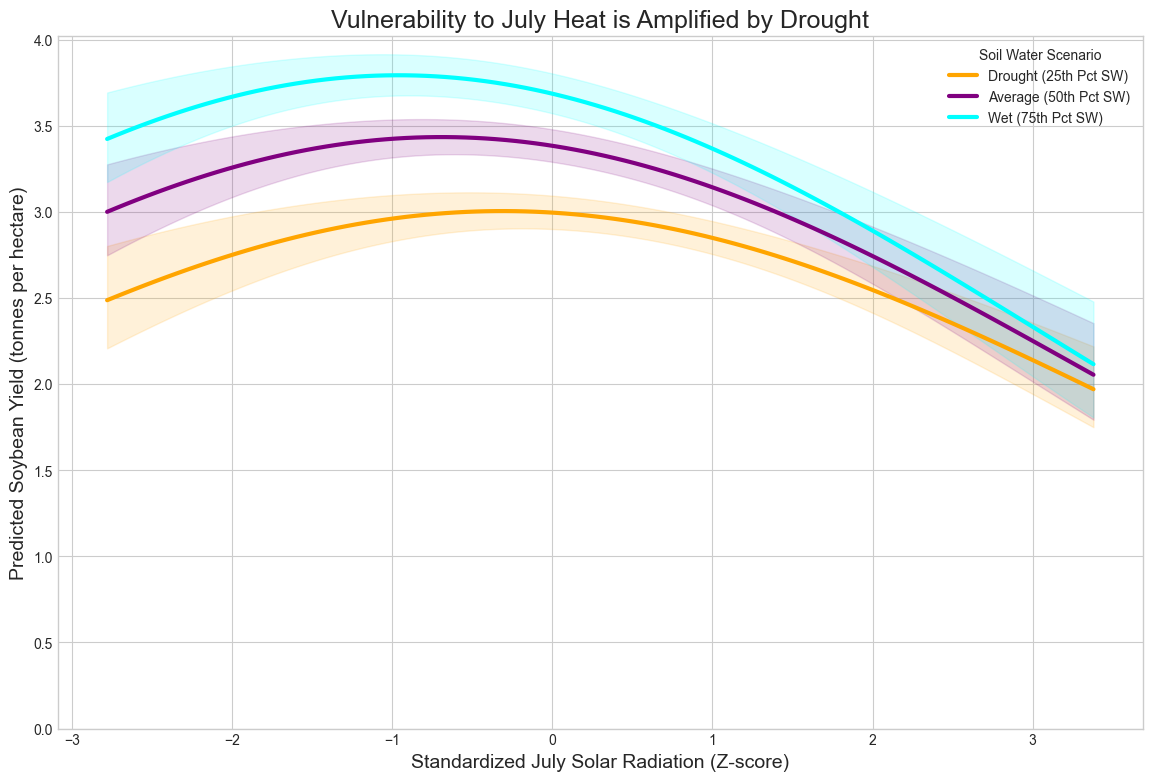

In [25]:
print("--- Generating Final Yield Response Curves for Soybean ---")

# --- 1. Load and Prepare Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'
df_soybean = pd.read_csv(file_path)
df_soybean = df_soybean[df_soybean['yield_soybean'] > 0].copy()

# Standardize the necessary variables for the model formula
df_soybean["solar_rad_Jul_z"] = (df_soybean["solar_radiation_Jul"] - df_soybean["solar_radiation_Jul"].mean()) / df_soybean["solar_radiation_Jul"].std()
print("Data prepared successfully.")

# --- 2. Fit Our Final Champion Model ---
final_champion_formula = """
    yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) +
                    potential_evaporation_May + solar_rad_Jul_z +
                    soil_water + precipitation_May +
                    I(solar_rad_Jul_z**2) + I(precipitation_May**2) +
                    solar_rad_Jul_z:soil_water + potential_evaporation_May:solar_rad_Jul_z
"""
print("Fitting Final Champion model for Soybean...")
final_model = smf.glm(
    formula=final_champion_formula,
    data=df_soybean,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()
print(f"Model fitted successfully. AIC: {final_model.aic:.2f}")


# --- 3. Prepare a Base Prediction Dictionary with Median Values ---
median_values = {
    'year': df_soybean['year'].median(),
    'lat': df_soybean['lat'].median(),
    'lon': df_soybean['lon'].median(),
    'potential_evaporation_May': df_soybean['potential_evaporation_May'].median(),
    'solar_rad_Jul_z': df_soybean['solar_rad_Jul_z'].median(), # Use the standardized variable
    'soil_water': df_soybean['soil_water'].median(),
    'precipitation_May': df_soybean['precipitation_May'].median()
}
sns.set_style("whitegrid")


# --- PLOT A: Yield Response to Soil Water ---
print("\nGenerating Plot A: Yield Response to Soil Water...")
soil_water_range = np.linspace(df_soybean['soil_water'].min(), df_soybean['soil_water'].max(), 100)
pred_df_sw = pd.DataFrame(median_values, index=range(100))
pred_df_sw['soil_water'] = soil_water_range

preds_sw = final_model.get_prediction(pred_df_sw).summary_frame(alpha=0.05)

plt.figure(figsize=(12, 8))
plt.plot(pred_df_sw['soil_water'], preds_sw['mean'], color='blue', linewidth=3, label='Predicted Yield')
plt.fill_between(pred_df_sw['soil_water'], preds_sw['mean_ci_lower'], preds_sw['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('Yield Response of Soybean to Aggregate Soil Water', fontsize=18)
plt.xlabel('Growing Season Average Soil Water (units)', fontsize=14)
plt.ylabel('Predicted Soybean Yield (tonnes per hectare)', fontsize=14)
plt.legend(); plt.ylim(bottom=0); plt.show()


# --- PLOT B: Non-Linear Yield Response to July Solar Radiation ---
print("\nGenerating Plot B: Non-Linear Yield Response to July Solar Radiation...")
solar_jul_z_range = np.linspace(df_soybean['solar_rad_Jul_z'].min(), df_soybean['solar_rad_Jul_z'].max(), 100)
pred_df_solar = pd.DataFrame(median_values, index=range(100))
pred_df_solar['solar_rad_Jul_z'] = solar_jul_z_range

preds_solar = final_model.get_prediction(pred_df_solar).summary_frame(alpha=0.05)

plt.figure(figsize=(12, 8))
plt.plot(pred_df_solar['solar_rad_Jul_z'], preds_solar['mean'], color='red', linewidth=3, label='Predicted Yield')
plt.fill_between(pred_df_solar['solar_rad_Jul_z'], preds_solar['mean_ci_lower'], preds_solar['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('Non-Linear Yield Response of Soybean to July Solar Radiation', fontsize=18)
plt.xlabel('Standardized July Solar Radiation (Z-score)', fontsize=14)
plt.ylabel('Predicted Soybean Yield (tonnes per hectare)', fontsize=14)
plt.legend(); plt.ylim(bottom=0); plt.show()


# --- PLOT C: Non-Linear Yield Response to May Precipitation ---
print("\nGenerating Plot C: Non-Linear Yield Response to May Precipitation...")
precip_may_range = np.linspace(df_soybean['precipitation_May'].min(), df_soybean['precipitation_May'].max(), 100)
pred_df_precip = pd.DataFrame(median_values, index=range(100))
pred_df_precip['precipitation_May'] = precip_may_range

preds_precip = final_model.get_prediction(pred_df_precip).summary_frame(alpha=0.05)

plt.figure(figsize=(12, 8))
plt.plot(pred_df_precip['precipitation_May'], preds_precip['mean'], color='green', linewidth=3, label='Predicted Yield')
plt.fill_between(pred_df_precip['precipitation_May'], preds_precip['mean_ci_lower'], preds_precip['mean_ci_upper'], color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('Non-Linear Yield Response of Soybean to May Precipitation', fontsize=18)
plt.xlabel('May Precipitation (mm)', fontsize=14)
plt.ylabel('Predicted Soybean Yield (tonnes per hectare)', fontsize=14)
plt.legend(); plt.ylim(bottom=0); plt.show()


# --- PLOT D: The "Money Plot" - Heat x Water Interaction ---
print('\nGenerating Plot D: The "Heat x Water" Interaction Effect...')
sw_quantiles = df_soybean['soil_water'].quantile([0.25, 0.5, 0.75])
scenarios = {
    'Drought (25th Pct SW)': {'value': sw_quantiles[0.25], 'color': 'orange'},
    'Average (50th Pct SW)': {'value': sw_quantiles[0.50], 'color': 'purple'},
    'Wet (75th Pct SW)': {'value': sw_quantiles[0.75], 'color': 'cyan'}
}

plt.figure(figsize=(14, 9))
for scenario_name, props in scenarios.items():
    pred_df_interact = pd.DataFrame(median_values, index=range(100))
    pred_df_interact['solar_rad_Jul_z'] = solar_jul_z_range # Vary solar radiation on x-axis
    pred_df_interact['soil_water'] = props['value'] # Set the soil water for this scenario
    
    preds_interact = final_model.get_prediction(pred_df_interact).summary_frame(alpha=0.05)
    
    plt.plot(pred_df_interact['solar_rad_Jul_z'], preds_interact['mean'], color=props['color'], linewidth=3, label=scenario_name)
    plt.fill_between(pred_df_interact['solar_rad_Jul_z'], preds_interact['mean_ci_lower'], preds_interact['mean_ci_upper'], color=props['color'], alpha=0.15)

plt.title('Vulnerability to July Heat is Amplified by Drought', fontsize=18)
plt.xlabel('Standardized July Solar Radiation (Z-score)', fontsize=14)
plt.ylabel('Predicted Soybean Yield (tonnes per hectare)', fontsize=14)
plt.legend(title='Soil Water Scenario'); plt.ylim(bottom=0); plt.show()

### **Analysis of Soybean Yield Response Curves**

These plots visualize the key relationships from our final, complex statistical model. They show how predicted soybean yield responds to specific climate factors while holding all others at their typical values.

#### **Plot A: Yield Response to Aggregate Soil Water**

*   **Primary Finding:** Higher average soil water throughout the growing season is consistently associated with higher soybean yields.
*   **Interpretation:** The plot shows a clear, strong positive relationship. This confirms that overall water availability is a fundamental driver of yield, which makes perfect agronomic sense as water is a key input for plant growth and seed development.

#### **Plot B: Non-Linear Yield Response to July Solar Radiation**

*   **Primary Finding:** The model reveals a distinct **inverted U-shape**, indicating an optimal level of solar radiation in July.
*   **Interpretation:** Yields peak when standardized solar radiation is slightly below average (around -0.5 Z-score). Beyond this optimum, higher solar radiation (representing "heat stress") causes a significant and accelerating decline in yield. This captures the critical vulnerability of soybean during its flowering and pod-setting phase.

#### **Plot C: Non-Linear Yield Response to May Precipitation**

*   **Primary Finding:** The relationship with May precipitation is also an **inverted U-shape**, showing that both too little and too much rain are suboptimal.
*   **Interpretation:** The curve shows that yields are maximized at a moderate level of May rainfall (around 200mm). This suggests that while some rain is essential for crop establishment, excessive rainfall can be detrimental, possibly due to waterlogging or associated cool, cloudy conditions.

#### **Plot D: The Interaction of Heat and Water Stress**

*   **Primary Finding:** The plant's vulnerability to July heat stress is **strongly mediated by water availability.**
*   **Interpretation:** This plot visualizes our most sophisticated finding. The three curves show the yield response to July heat under different soil water scenarios. The "Wet" curve (cyan) is consistently higher than the "Drought" curve (orange). This visually proves that having ample soil water **increases the overall yield potential** and helps the crop **better tolerate heat stress**, leading to higher yields at any given level of July solar radiation.

--- Generating Final Vulnerability Curves for Soybean ---
Data prepared successfully.
Final champion model for Soybean fitted successfully. AIC: 3447.76

Predicted baseline yield for a typical case (median heat, median water): 3.38 t/ha
Generating the vulnerability curve plot...


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


An unexpected error occurred: name 'PercentFormatter' is not defined


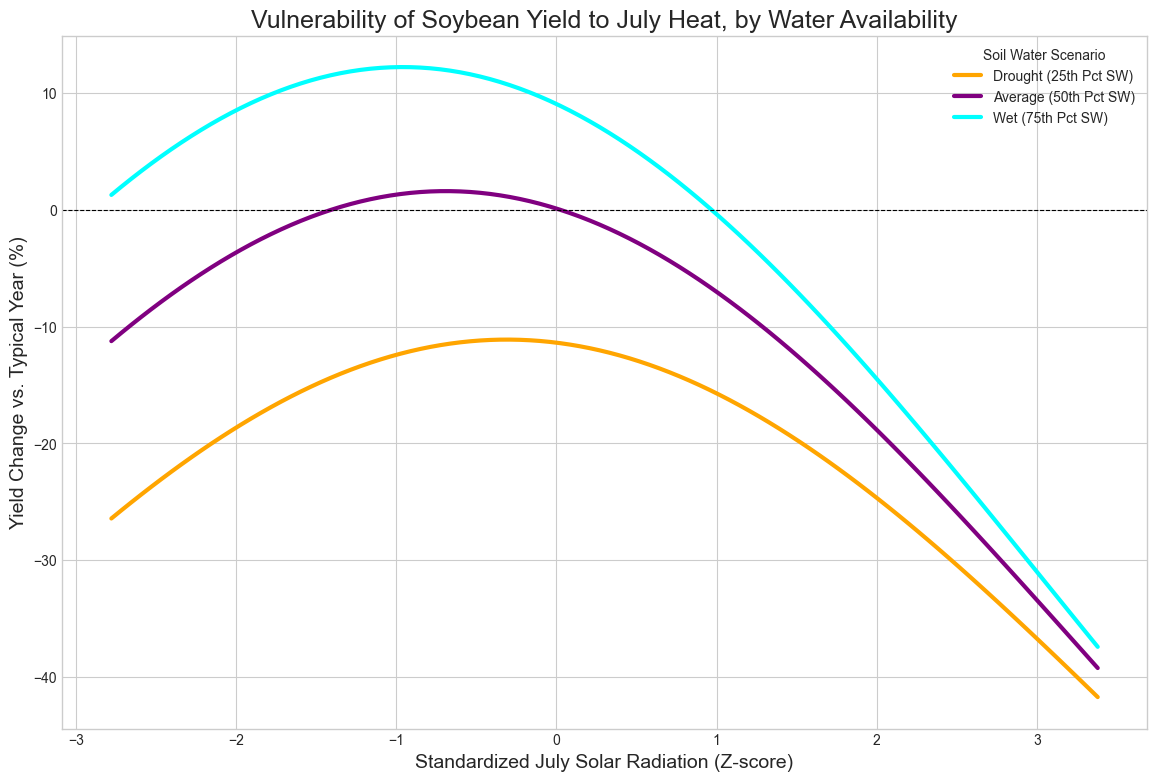

In [26]:
print("--- Generating Final Vulnerability Curves for Soybean ---")

# --- 1. Load and Prepare Data ---
file_path = '../data-cherry-pick/soybean_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_soybean = pd.read_csv(file_path)
    df_soybean = df_soybean[df_soybean['yield_soybean'] > 0].copy()

    # Standardize the necessary variables
    df_soybean["solar_rad_Jul_z"] = (df_soybean["solar_radiation_Jul"] - df_soybean["solar_radiation_Jul"].mean()) / df_soybean["solar_radiation_Jul"].std()
    print("Data prepared successfully.")

    # --- 2. Fit Our Final Champion Model ---
    final_champion_formula = """
        yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) +
                        potential_evaporation_May + solar_rad_Jul_z +
                        soil_water + precipitation_May +
                        I(solar_rad_Jul_z**2) + I(precipitation_May**2) +
                        solar_rad_Jul_z:soil_water + potential_evaporation_May:solar_rad_Jul_z
    """
    final_model = smf.glm(
        formula=final_champion_formula,
        data=df_soybean,
        family=sm.families.Gamma(link=sm.families.links.log())
    ).fit()
    print(f"Final champion model for Soybean fitted successfully. AIC: {final_model.aic:.2f}\n")

    # --- 3. Define Scenarios and the Baseline ---
    # We define our water stress scenarios
    sw_quantiles = df_soybean['soil_water'].quantile([0.25, 0.5, 0.75])
    scenarios = {
        'Drought (25th Pct SW)': {'value': sw_quantiles[0.25], 'color': 'orange'},
        'Average (50th Pct SW)': {'value': sw_quantiles[0.50], 'color': 'purple'},
        'Wet (75th Pct SW)': {'value': sw_quantiles[0.75], 'color': 'cyan'}
    }
    
    # Our "typical year" is an average year for water and an average year for heat
    median_values = {
        'year': df_soybean['year'].median(),
        'lat': df_soybean['lat'].median(),
        'lon': df_soybean['lon'].median(),
        'potential_evaporation_May': df_soybean['potential_evaporation_May'].median(),
        'solar_rad_Jul_z': df_soybean['solar_rad_Jul_z'].median(), # Median (average) heat
        'soil_water': df_soybean['soil_water'].median(),      # Median (average) water
        'precipitation_May': df_soybean['precipitation_May'].median()
    }
    X_baseline = pd.DataFrame(median_values, index=[0])
    yield_baseline = final_model.get_prediction(X_baseline).summary_frame()['mean'].iloc[0]
    print(f"Predicted baseline yield for a typical case (median heat, median water): {yield_baseline:.2f} t/ha")

    # --- 4. Generate and Plot Vulnerability for Each Scenario ---
    print("Generating the vulnerability curve plot...")
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(14, 9))
    
    solar_jul_z_range = np.linspace(df_soybean['solar_rad_Jul_z'].min(), df_soybean['solar_rad_Jul_z'].max(), 100)

    for scenario_name, props in scenarios.items():
        # Create the prediction grid for this scenario
        pred_df_scenario = pd.DataFrame(median_values, index=range(100))
        pred_df_scenario['solar_rad_Jul_z'] = solar_jul_z_range # Vary heat on x-axis
        pred_df_scenario['soil_water'] = props['value']     # Set the water level for this scenario
        
        # Get predictions
        preds = final_model.get_prediction(pred_df_scenario).summary_frame(alpha=0.05)
        yield_predicted = preds['mean']
        
        # Calculate percentage change from the single baseline
        yield_change_pct = ((yield_predicted - yield_baseline) / yield_baseline) * 100
        
        # Plot the vulnerability curve for this scenario
        ax.plot(solar_jul_z_range, yield_change_pct, color=props['color'], linewidth=3, label=scenario_name)

    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_title('Vulnerability of Soybean Yield to July Heat, by Water Availability', fontsize=18)
    ax.set_xlabel('Standardized July Solar Radiation (Z-score)', fontsize=14)
    ax.set_ylabel('Yield Change vs. Typical Year (%)', fontsize=14)
    ax.legend(title='Soil Water Scenario')
    ax.yaxis.set_major_formatter(PercentFormatter())
    
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### **Analysis of the Final Soybean Vulnerability Curve**

This multi-line vulnerability curve is the ultimate output of our soybean analysis. It visualizes the model's most important and sophisticated finding: the powerful interaction between July heat stress and overall water availability.

#### **How to Read This Plot**

*   The **X-axis** represents July conditions, from cool/cloudy (negative Z-scores) to hot/sunny (positive Z-scores).
*   The **Y-axis** shows the predicted percentage change in yield compared to a baseline "typical year" (which has both average heat and average water).
*   The **three colored lines** represent the vulnerability to July heat under three different seasonal water availability scenarios: Drought, Average, and Wet.

#### **Primary Findings**

1.  **Water Availability Sets the Yield Potential:**
    *   The most striking feature is the clear separation of the curves. The "Drought" scenario (orange) is always in the negative, showing that a dry season consistently leads to **below-average yields**, with losses ranging from -10% to over -40%.
    *   Conversely, the "Wet" scenario (cyan) is the only one that allows for **above-average yields**, with gains of over +10% possible under optimal temperatures.

2.  **Heat Stress Determines the Final Outcome:**
    *   All three curves show the same **inverted U-shape**, confirming that there is an optimal temperature for soybean in July. Extreme heat (moving to the right) is always damaging.
    *   The key interaction is visible in the slopes: the decline in yield due to heat stress is **most severe in a drought year**. For example, moving from the optimal temperature to a "heatwave" (Z-score of +2) causes a much larger percentage loss in the "Drought" scenario than it does in the "Wet" scenario.

#### **Overall Conclusion**

The model's most powerful finding is that **water availability is the master variable that sets the yield potential for soybean, while July heat stress determines how much of that potential is realized or lost.** A drought year has a low yield ceiling and is highly vulnerable to heatwaves. A wet year not only has a much higher yield potential but also demonstrates greater resilience, suffering a smaller percentage loss when faced with the same level of heat stress. This quantifies the critical, compounding nature of climate risk for soybean production.

### **Final Soybean Model: Interpretation and Conclusions**

This section summarizes the final champion model developed to explain the relationship between monthly climate stressors and soybean yield in Northern Italy. The model is the result of a multi-step workflow designed to be statistically robust, parsimonious, and highly insightful.

#### **The Final Champion Model**

After a data-driven process of variable selection and extensive iterative refinement, the final, best-performing model was determined to be a Gamma GLM with a complex interactive structure:

**Final Model Formula:**
```
yield_soybean ~ year + bs(lat, df=4) + bs(lon, df=4) + 
                potential_evaporation_May + solar_rad_Jul_z + 
                soil_water + precipitation_May + 
                I(solar_rad_Jul_z**2) + I(precipitation_May**2) + 
                solar_rad_Jul_z:soil_water + potential_evaporation_May:solar_rad_Jul_z
```

**Key Performance Metrics:**
*   **Akaike Information Criterion (AIC):** `3447.76` (The lowest of all tested models)
*   **Pseudo R-squared (CS):** `0.8513` (Explains approx. **85.1%** of the variation in yield)

#### **The Modeling Journey: How We Arrived Here**

The final model was the product of a systematic, evidence-based process:

1.  **Variable Selection:** An **Elastic Net regularization** revealed that soybean yield is influenced by a more complex mix of factors than the previously modeled crops, identifying a broader set of robust climate predictors to carry forward.

2.  **Model Refinement (Parsimony):** An initial base model was fitted, and non-significant predictors (`solar_radiation_Aug`, `solar_radiation_Sep`) were removed to create a simpler, more robust model with an improved AIC.

3.  **Testing for Non-Linearity:** Guided by EDA and agronomic theory, we tested for non-linear effects one at a time. Adding a quadratic term for `solar_radiation_Jul` (after standardization) and `precipitation_May` both resulted in **massive drops in AIC**, confirming two distinct and critical non-linear relationships.

4.  **Testing for Interactions:** We tested a series of plausible, theory-driven interactions. The model was significantly improved by including both the **`solar_rad_Jul_z:soil_water`** (Heat x Water Stress) and the **`potential_evaporation_May:solar_rad_Jul_z`** (Early vs. Mid-season Stress) interactions, each providing a large, statistically significant improvement in model fit.

This structured process ensures our final model is not overfit and that its complexity is justified by strong statistical evidence.

#### **Detailed Interpretation of the Final Model**

*   **Control Variables:**
    *   `year`: The positive, significant coefficient confirms a **technological trend**, with yields consistently increasing over time.
    *   `bs(lat, df=4)` & `bs(lon, df=4)`: The high significance of the spatial splines confirms that **geography is a dominant driver** of yield.

*   **Key Climate Drivers:**
    *   **Non-Linear Effects:** The model identified two "optimum" conditions. Both `solar_radiation_Jul` and `precipitation_May` have **inverted U-shaped effects**, indicating that yields are maximized at a moderate level of July sun/heat and May rainfall. Too little or too much of either is detrimental.
    *   **Interaction 1 (Heat x Water):** The significant `solar_rad_Jul_z:soil_water` interaction confirms that the negative impact of July heat stress is **amplified by drought**. Ample water availability helps the crop tolerate heat.
    *   **Interaction 2 (Early x Mid-Season):** The significant `potential_evaporation_May:solar_rad_Jul_z` interaction reveals a compounding effect across the season, where early-season conditions in May modify the crop's response to heat stress in July.

#### **Insights from Visualization**

*   **The Non-Linear Response Curves:** The yield response plots for `solar_radiation_Jul` and `precipitation_May` visually confirm the **inverted U-shapes**. They allow us to identify the optimal points for these stressors and clearly see how yield declines when conditions deviate from this optimum.

*   **The Final Vulnerability Curve (Interaction Plot):** This plot is the ultimate synthesis of the model's findings. By showing the vulnerability to July heat under different water scenarios (Drought, Average, Wet), it tells a powerful, multi-faceted story:
    *   **Water Sets the Potential:** The plot clearly shows that achieving an **above-average yield** (+10%) is only possible in a "Wet" year. A "Drought" year has a much lower yield ceiling and is always predicted to have a below-average yield (from -10% to -40%).
    *   **Heat Determines the Outcome:** In all scenarios, extreme heat (moving to the right on the x-axis) causes a sharp decline in yield. However, this decline is **most severe in a drought year**, visually confirming that water-stressed plants are far more vulnerable to heatwaves.

#### **Overall Conclusion**

The model provides a powerful and nuanced explanation of soybean yield vulnerability. The dominant story is a complex interplay of **heat and water**. The model's core insight is that **water availability is the master variable that sets the yield potential for the season, while July heat stress determines how much of that potential is ultimately realized.** A dry season is a state of chronic stress with a low yield ceiling and extreme vulnerability to heat. Conversely, a wet season not only has a higher yield potential but also provides a crucial buffer, making the crop more resilient to mid-summer heatwaves.